In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from collections import Counter, OrderedDict
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DataSet/final_dataset.csv")

In [3]:
df.columns

Index(['original_text', 'preprocessed_text', 'length_text', 'not_tag_text',
       'airline', 'airline_sentiment', 'negative_reason'],
      dtype='object')

## 1 - Frequency Count:

In [4]:
def freq_count(data, column, with_tag):
    total_words=[]
    for lista in data[column].fillna(""):
        words = lista.split()
        for word in words:
            if not with_tag:
                if "@" not in word:
                    total_words.append(word)
            else:
                total_words.append(word)
    counts=Counter(total_words)
    most_occur = counts.most_common(10) 
    print("For column: " + str(column) + " 10 most occur word")
    print(most_occur)

In [5]:
freq_count(df, "preprocessed_text", True)

For column: preprocessed_text 10 most occur word
[('@mention', 16292), ('@number', 5694), ('flight', 4780), ('@hashtag', 3522), ('get', 2097), ('thank', 1671), ('@url', 1211), ('@emoji', 1166), ('hour', 1134), ('cancel', 1048)]


In [6]:
freq_count(df, "preprocessed_text", False)

For column: preprocessed_text 10 most occur word
[('flight', 4780), ('get', 2097), ('thank', 1671), ('hour', 1134), ('cancel', 1048), ('service', 990), ('delay', 969), ('time', 949), ('customer', 927), ('help', 920)]


# 2 - Frequency count coppie (count bigrammi)
- Usando la parola più frequente "flight"

In [5]:
def pair_freq_count(data, column, word_to_search, with_tag):
    pair_freq = []
    for words in data[column].fillna(""):
        word_pair_list = list(nltk.bigrams(words.split()))
        for pair in word_pair_list:
            if (pair[0] == word_to_search) or (pair[1] == word_to_search):
                if(pair[0] != pair[1]):
                    if not with_tag:
                        if "@" not in pair[1] and "@" not in pair[0]:
                            pair_freq.append(pair)
                    else:
                        pair_freq.append(pair)
    counts=Counter(pair_freq)
    print(counts.most_common(10))

In [6]:
def pair_freq_count_word(data, column, word_to_search):
    pair_freq = []
    for words in data[column].fillna(""):
        word_pair_list = list(nltk.bigrams(words.split()))
        for pair in word_pair_list:
            if (pair[0] == word_to_search) or (pair[1] == word_to_search):
                if(pair[0] != pair[1]):
                    if(pair[0]!= word_to_search):
                        pair_freq.append(pair[0])
                    else:
                        pair_freq.append(pair[1])
    counts=Counter(pair_freq)
    print(counts.most_common(10))

In [9]:
pair_freq_count(df, "preprocessed_text", "flight", True)

[(('flight', '@number'), 657), (('@mention', 'flight'), 525), (('cancel', 'flight'), 419), (('late', 'flight'), 243), (('flight', 'cancel'), 219), (('flight', '@hashtag'), 144), (('@number', 'flight'), 130), (('flight', 'delay'), 129), (('flightled', 'flight'), 128), (('flight', 'book'), 108)]


In [10]:
pair_freq_count(df, "preprocessed_text", "flight", False)

[(('cancel', 'flight'), 419), (('late', 'flight'), 243), (('flight', 'cancel'), 219), (('flight', 'delay'), 129), (('flightled', 'flight'), 128), (('flight', 'book'), 108), (('delay', 'flight'), 97), (('flight', 'attendant'), 97), (('change', 'flight'), 85), (('book', 'flight'), 79)]


# 3 - WordCloud

In [7]:
def plot_wordCloud(data, text_column):        
    words = ' '.join(data[text_column].fillna(''))
    wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [12]:
plot_wordCloud(df[df['airline_sentiment']=='negative'], "preprocessed_text")

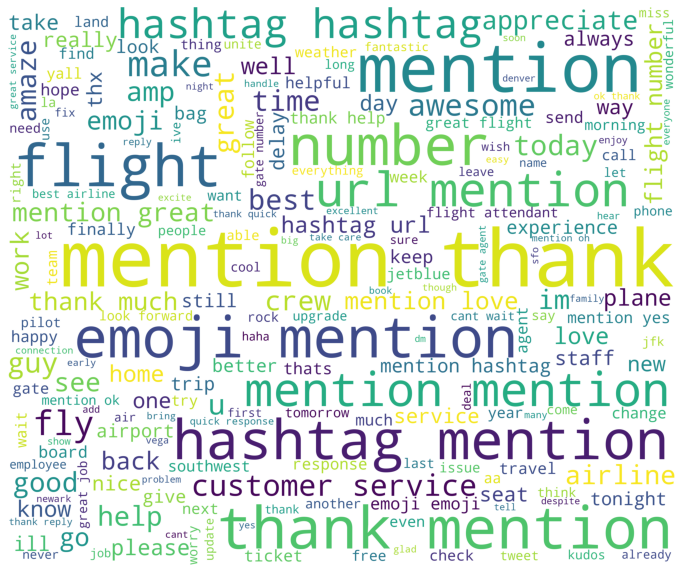

In [13]:
plot_wordCloud(df[df['airline_sentiment']=='positive'], "preprocessed_text")

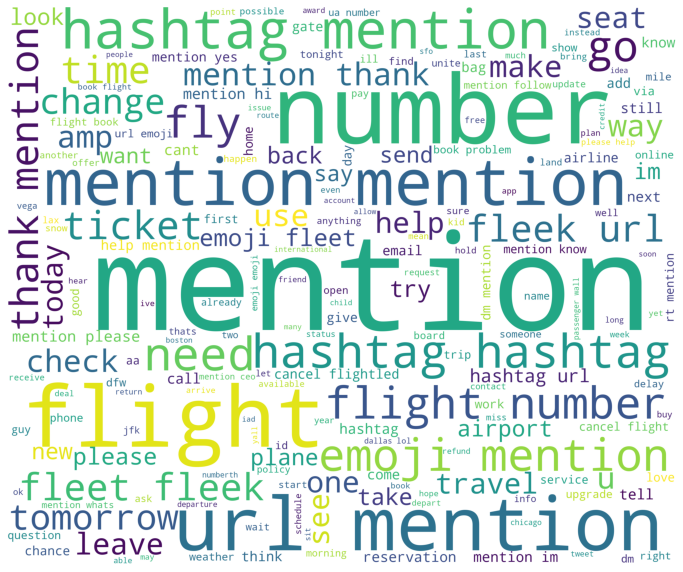

In [14]:
plot_wordCloud(df[df['airline_sentiment']=='neutral'], "preprocessed_text")

Wordcloud without @word

******** NEGATIVE ********


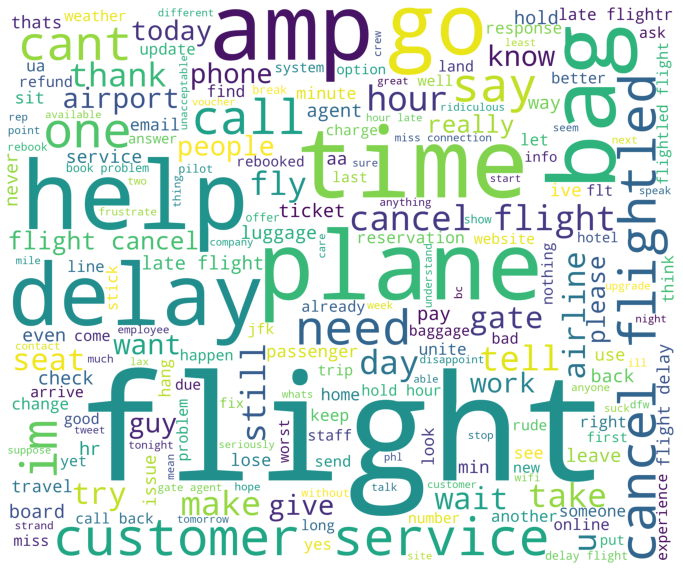

******** POSITIVE ********


******** NEUTRAL ********


In [15]:
print("******** NEGATIVE ********")
plot_wordCloud(df[df['airline_sentiment']=='negative'], "not_tag_text")
print("******** POSITIVE ********")
plot_wordCloud(df[df['airline_sentiment']=='positive'], "not_tag_text")
print("******** NEUTRAL ********")
plot_wordCloud(df[df['airline_sentiment']=='neutral'], "not_tag_text")

# WordCloud for Negative Reason

In [8]:
df.columns

Index(['original_text', 'preprocessed_text', 'length_text', 'not_tag_text',
       'airline', 'airline_sentiment', 'negative_reason'],
      dtype='object')

In [9]:
tmp_df = df[(df["negative_reason"]!="Can't Tell") & (df["negative_reason"].isnull()==False)]

In [12]:
reasons = list(set(tmp_df["negative_reason"]))

****** WordCloud for reason Flight Booking Problems *****


****** WordCloud for reason Damaged Luggage *****


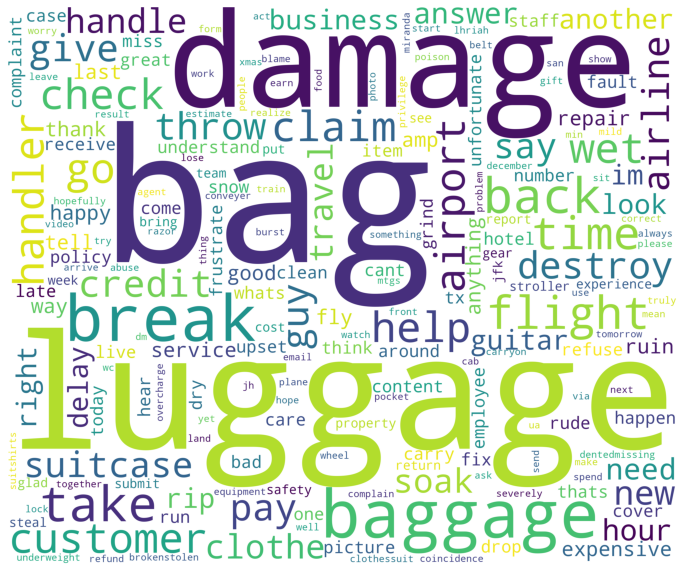

****** WordCloud for reason Late Flight *****


****** WordCloud for reason Cancelled Flight *****


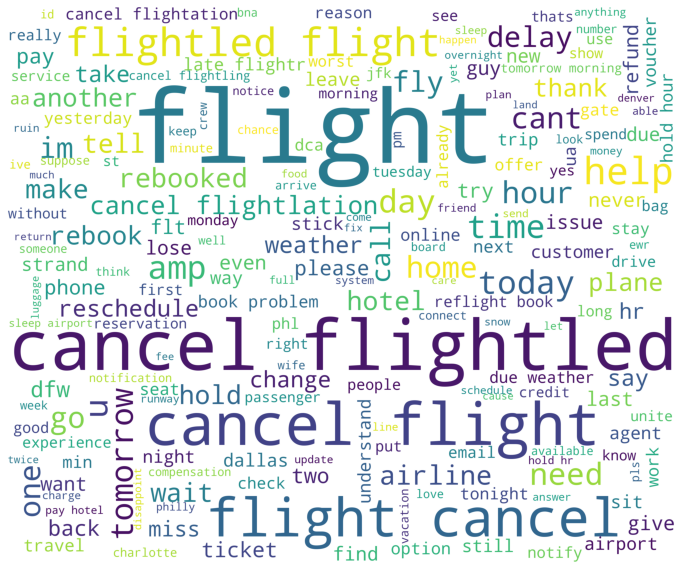

****** WordCloud for reason Lost Luggage *****


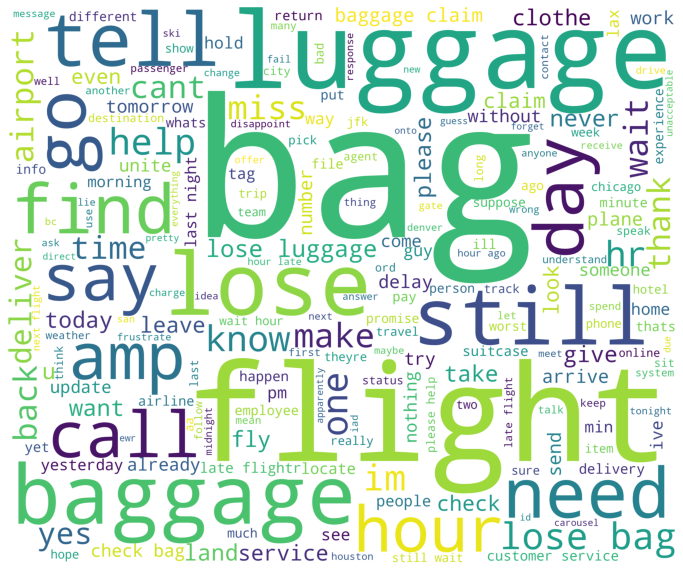

****** WordCloud for reason longlines *****


****** WordCloud for reason Bad Flight *****


****** WordCloud for reason Customer Service Issue *****


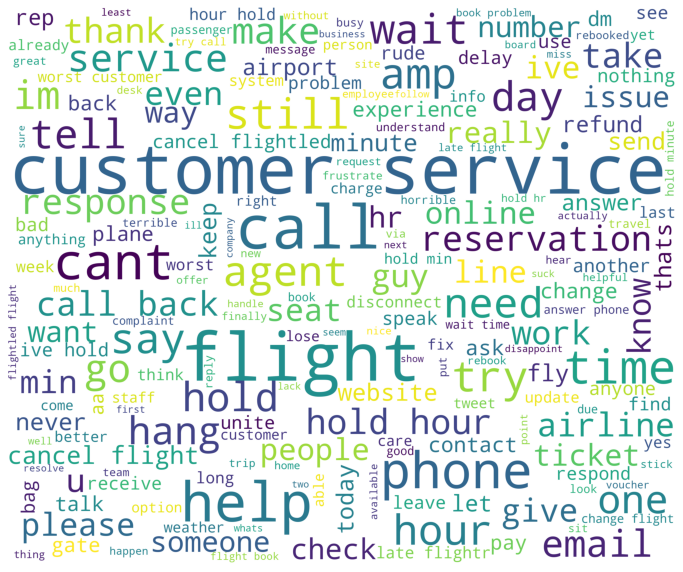

****** WordCloud for reason Flight Attendant Complaints *****


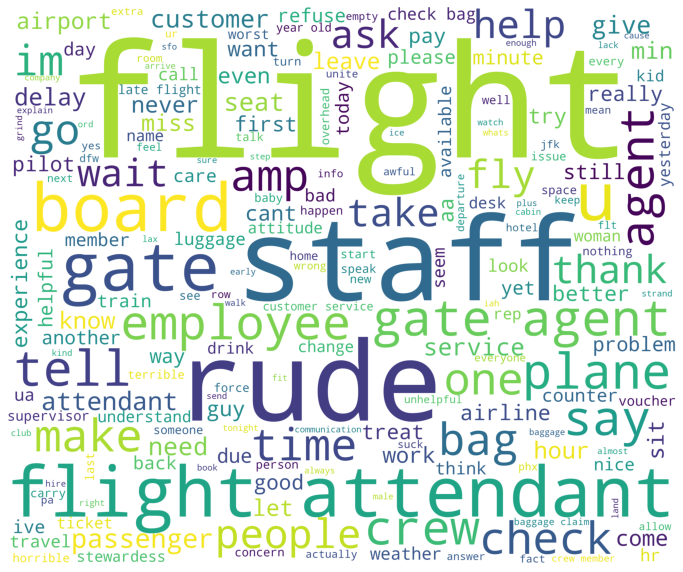

In [13]:
for i in reasons:
    print(f"****** WordCloud for reason {i} *****")
    plot_wordCloud(df[df['negative_reason']==i], "not_tag_text")

# Frequency of bigram

Most common 2 bigram

In [16]:
counts = Counter()
for sent in df["not_tag_text"]:
    words = nltk.word_tokenize(sent)
    counts.update(nltk.bigrams(words))
counts.most_common(2) 

[(('customer', 'service'), 564), (('cancel', 'flightled'), 497)]

# Word frequency for negative reason

In [17]:
negative_reason = list(set(df["negative_reason"]))[1:]

In [18]:
negative_reason

['Late Flight',
 'Flight Attendant Complaints',
 "Can't Tell",
 'Customer Service Issue',
 'Flight Booking Problems',
 'Cancelled Flight',
 'longlines',
 'Bad Flight',
 'Damaged Luggage',
 'Lost Luggage']

In [22]:
for i in negative_reason:
    counts = Counter()
    for sent in df[df["negative_reason"]==i]["not_tag_text"]:
        words = nltk.word_tokenize(sent)
        counts.update(nltk.bigrams(words))
    print(f"Negative reason: {i}")
    print(f"Most common words:\n {counts.most_common(4)}") 

Negative reason: Late Flight
Most common words:
 [(('late', 'flight'), 139), (('flight', 'delay'), 128), (('delay', 'flight'), 75), (('hour', 'delay'), 62)]
Negative reason: Flight Attendant Complaints
Most common words:
 [(('flight', 'attendant'), 45), (('gate', 'agent'), 37), (('check', 'bag'), 10), (('late', 'flight'), 8)]
Negative reason: Can't Tell
Most common words:
 [(('worst', 'airline'), 30), (('fleet', 'fleek'), 23), (('never', 'fly'), 21), (('rt', 'fleet'), 13)]
Negative reason: Customer Service Issue
Most common words:
 [(('customer', 'service'), 402), (('hold', 'hour'), 99), (('call', 'back'), 96), (('cancel', 'flight'), 73)]
Negative reason: Flight Booking Problems
Most common words:
 [(('book', 'problem'), 33), (('book', 'flight'), 31), (('flight', 'book'), 27), (('try', 'book'), 23)]
Negative reason: Cancelled Flight
Most common words:
 [(('cancel', 'flightled'), 355), (('cancel', 'flight'), 241), (('flight', 'cancel'), 188), (('flight', 'flight'), 101)]
Negative reason